# 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [46]:
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException
import warnings
warnings.filterwarnings("ignore")

In [47]:
driver=webdriver.Chrome(r"C:\Users\balub\Downloads\chromedriver_win32\chromedriver.exe")
driver=webdriver.Chrome("chromedriver.exe")
driver.get("https://www.amazon.in/")

In [48]:
product_search=driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
product_search.send_keys(input("Enter the Name of Product "))

Enter the Name of Product guitar


In [49]:
search=driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input")
search.click()

# 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.


In [51]:
page_url = []
for i in driver.find_elements_by_xpath("//li[@class='a-selected' or @class='a-normal']//a"):
    page_url.append(i.get_attribute("href"))
time.sleep(5)

In [53]:
brand=[]
prdct_name=[]
price=[]
exchange=[]
delivery=[]
availability=[]
url=[]

In [ ]:
for i in page_url[3]:
    driver.get(i)
    time.sleep(3)
    urls = []
    for i in driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']//a"):
        urls.append(i.get_attribute("href"))

In [56]:
try:
    brnd = driver.find_element_by_xpath("//td[@class='a-span9']//span")
    brand.append(brnd.text)
except NoSuchElementException:
    brand.append('-')

In [58]:
try:
    name = driver.find_element_by_id("productTitle")
    prdct_name.append(name.text)
except NoSuchElementException:
    prdct_name.append('-')

In [60]:
try:
    prc = driver.find_element_by_xpath("//td[@class='a-span12']//span")
    price.append(prc.text.replace('₹ ','Rs'))
except NoSuchElementException:
    price.append('-')

In [61]:
try:
    exchng = driver.find_element_by_id("RETURNS_POLICY")
    exchange.append(exchng.text)
except NoSuchElementException:
    exchange.append('-')

In [63]:
try:
    dlvry = driver.find_element_by_xpath("//div[@id='ddmDeliveryMessage']//b")
    delivery.append(dlvry.text)
except NoSuchElementException:
    delivery.append('-')

In [64]:
try:
    avail = driver.find_element_by_xpath("//div[@id='availability']//span")
    availability.append(avail.text)
except NoSuchElementException:
    availability.append('-')

In [66]:
purl = driver.find_elements_by_xpath("//h2[@class='a-size-mini a-spacing-none a-color-base s-line-clamp-4']//a")
for i in purl:
    url.append(i.get_attribute("href"))
    time.sleep(3)

In [ ]:
df=pd.DataFrame({})
df['Brand_Name']=brand
df['Name_of_the_Product']=prdct_name
df['Price']=price
df['Return/Exchange']=exchange
df['Expected_Delivery']=delivery
df['Availability']=availability
df['Product_URL']=url

# 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [69]:
driver=webdriver.Chrome(r"C:\Users\balub\Downloads\chromedriver_win32\chromedriver.exe")
driver=webdriver.Chrome("chromedriver.exe")
driver.get("https://images.google.com/")

In [71]:
fruits_search = driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
fruits_search.send_keys('fruits')

In [74]:
search = driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
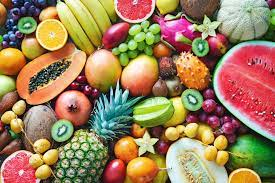
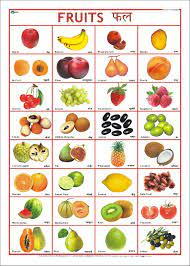
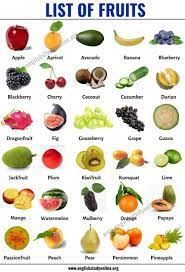
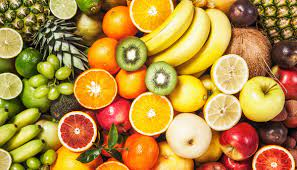
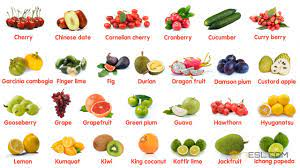
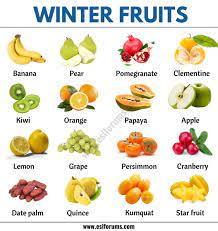
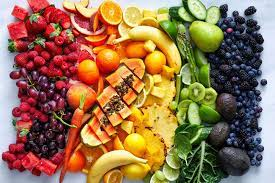
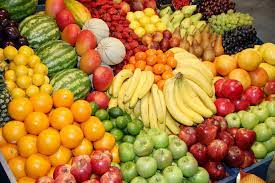
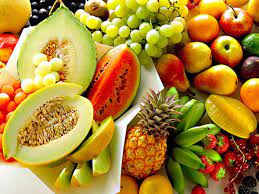
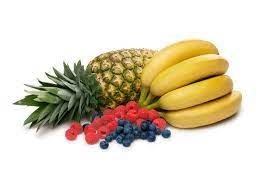

In [76]:
url1 =driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
Fruit_url = []
for i in url1[0:10]:
    Fruit_url.append(i.get_attribute('src'))
Fruit_url

In [80]:
search = driver.find_element_by_xpath("//input[@class='og3lId']")
search.send_keys('cars')

In [81]:
search_button = driver.find_element_by_xpath("//span[@class='n6h3Rc']")
search_button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
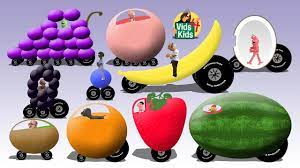
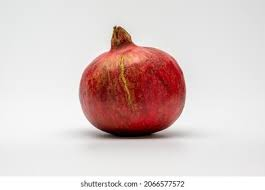
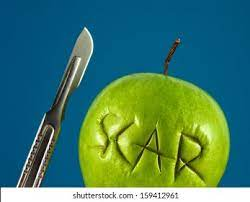
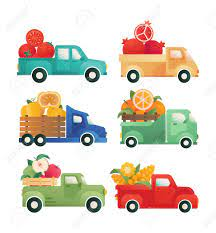
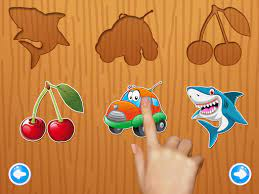
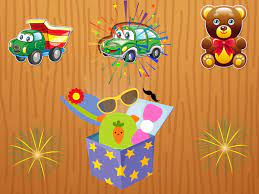
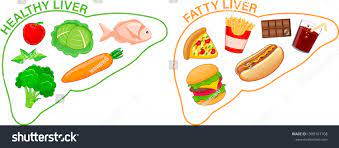
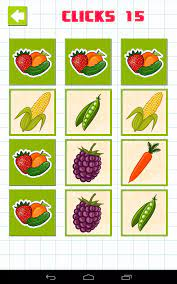
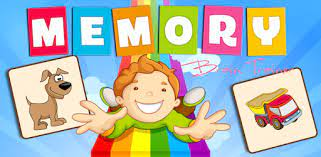
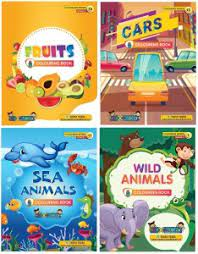

In [82]:
url2 = driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
Cars_url = []
for i in url2[0:10]:
    Cars_url.append(i.get_attribute('src'))
Cars_url

In [84]:
ml_search =driver.find_element_by_xpath("//input[@class='og3lId']")
ml_search.send_keys('Machine Learning')

In [90]:
url3 = driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
ml_url = []
for i in url3[0:10]:
    ml_url.append(i.get_attribute('src'))

In [87]:
guitar_search = driver.find_element_by_xpath("//input[@class='og3lId']")
guitar_search.send_keys('guitar')

In [89]:
url4 = driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
gt_url = []
for i in url4[0:10]:
    gt_url.append(i.get_attribute('src'))

In [91]:
search = driver.find_element_by_xpath("//input[@class='og3lId']")
search.send_keys('cakes')

In [92]:
url5 = driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
cake_url = []
for i in url5[0:10]:
    cake_url.append(i.get_attribute('src'))

# 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [136]:
driver=webdriver.Chrome(r"C:\Users\balub\Downloads\chromedriver_win32\chromedriver.exe")
driver=webdriver.Chrome("chromedriver.exe")
driver.get("https://www.flipkart.com/")

In [138]:
product_search =driver.find_element_by_xpath("//input[@class='_3704LK']")
product_search.send_keys('smartphone')
search_button = driver.find_element_by_xpath("//button[@class='L0Z3Pu']")
search_button.click()

In [139]:
brand_name=[]
smartphone_name=[]
colour=[]
RAM=[]
storage=[]
primary_cam=[]
secondary_cam=[]
display_size=[]
battery=[]
price=[]
url=[]

In [140]:
brand = driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in brand:
    brand_name.append(i.text.split()[0])

In [142]:
name = driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in name:
    smartphone_name.append(i.text)

In [145]:
url = driver.find_elements_by_xpath("//div[@class='_2kHMtA']//a")
urls = []
for i in url:
    urls.append(i.get_attribute('href'))

In [146]:
for i in urls:
    driver.get(i)
    color = driver.find_elements_by_xpath("//td[@class='URwL2w col col-9-12']")
    for i in color[3:4:74]:
        colour.append(i.text)

In [148]:
for i in urls:
    driver.get(i)
    ram = driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in ram[0:1:14]:
        RAM.append(i.text.split()[0:3])

In [154]:
for i in urls:
    driver.get(i)
    rom = driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in rom[0:1:14]:
        storage.append(i.text.split()[4:7])

In [161]:
for i in urls:
    driver.get(i)
    cam = driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in cam[2:3:13]:
        primary_cam.append(i.text.split()[0:2])

In [ ]:
for i in urls:
    driver.get(i)
    cam = driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in cam[2:3:14]:
        secondary_cam.append(i.text)

In [129]:
for i in urls:
    driver.get(i)
    size = driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in size[1:2:14]:
        display_size.append(i.text)

In [130]:
for i in urls:
    driver.get(i)
    b = driver.find_elements_by_xpath("//li[@class='_21Ahn-']")
    for i in b[3:4:14]:
        battery.append(i.text)

In [132]:
for i in urls:
    driver.get(i)
    p = driver.find_elements_by_xpath("//div[@class='_30jeq3 _16Jk6d']")
    for i in p:
        price.append(i.text)

In [135]:
u = driver.find_elements_by_xpath("//div[@class='_2kHMtA']//a")
for i in u:
    url.append(i.get_attribute('href'))

In [ ]:
Smartphones = pd.DataFrame({})
Smartphones['Brand Name']= brand_name
Smartphones['Smartphone Name']= smartphone_name
Smartphones['Colour'] = colour
Smartphones['RAM'] = RAM
Smartphones['Storage'] = storage
Smartphones['Primary Camera'] = primary_camera
Smartphones['Secondary Camera'] = secondary_camera
Smartphones['Display size'] =display_size 
Smartphones['Battery'] = battery
Smartphones['Price'] = price
Smartphones['URL'] = url
Smartphones